#### Why RELU is commonly used in CNN ?


ReLU (Rectified Linear Unit) is commonly used in CNNs (Convolutional Neural Networks) for a few key reasons:

It introduces nonlinearity: Without an activation function like ReLU, neural networks would be limited to linear transformations, severely restricting what they can model. ReLU adds essential nonlinearity.

It avoids the vanishing gradient problem: Because ReLU only outputs positive values, it avoids issues like sigmoid or tanh that can slowly converge gradients to 0 for large negative inputs. This helps CNNs continue learning efficiently.

It is computationally efficient: ReLU just performs a simple thresholding step - max(0,x). This is much faster to compute than exponential/trigonometric functions. This efficiency is important for deep CNNs.

It sparsifies activations: By outputting 0 for negative inputs, ReLU activations are often sparse. This also leads to some efficiency benefits by saving memory and computations when values are 0.

Empirical performance: Experience has shown ReLU delivers strong results on computer vision tasks compared to other activations. Researchers think its linear, non-saturating form aids generalization.

### Optimizers

In the context of deep learning, optimizers are algorithms or methods used to minimize the error or loss function during the training of a neural network. The goal of training a neural network is to find the optimal set of parameters (weights and biases) that minimizes the difference between the predicted output and the actual target values.

The training process involves updating the model parameters iteratively to reduce the error. Optimizers play a crucial role in determining how these updates are made. They define the rules or strategies for adjusting the model parameters based on the gradients of the loss function with respect to those parameters.



#### Gradient Descent

Gradient Descent is the most basic but most used optimization algorithm. It’s used heavily in linear regression and classification algorithms. Backpropagation in neural networks also uses a gradient descent algorithm.

Gradient descent is a first-order optimization algorithm which is dependent on the first order derivative of a loss function. It calculates that which way the weights should be altered so that the function can reach a minima. Through backpropagation, the loss is transferred from one layer to another and the model’s parameters also known as weights are modified depending on the losses so that the loss can be minimized.

algorithm: θ=θ−α⋅∇J(θ)

Advantages:

Easy computation.
Easy to implement.
Easy to understand.

Disadvantages:

May trap at local minima.
Weights are changed after calculating gradient on the whole dataset. So, if the dataset is too large than this may take years to converge to the minima.
Requires large memory to calculate gradient on the whole dataset.

#### Stocastic Gradient Descent

It’s a variant of Gradient Descent. It tries to update the model’s parameters more frequently. In this, the model parameters are altered after computation of loss on each training example. So, if the dataset contains 1000 rows SGD will update the model parameters 1000 times in one cycle of dataset instead of one time as in Gradient Descent.

θ=θ−α⋅∇J(θ;x(i);y(i)) , where {x(i) ,y(i)} are the training examples.

As the model parameters are frequently updated parameters have high variance and fluctuations in loss functions at different intensities.

Advantages:

Frequent updates of model parameters hence, converges in less time.
Requires less memory as no need to store values of loss functions.
May get new minima’s.

Disadvantages:

High variance in model parameters.
May shoot even after achieving global minima.
To get the same convergence as gradient descent needs to slowly reduce the value of learning rate.

#### Mini-Batch Gradient Descent

It’s best among all the variations of gradient descent algorithms. It is an improvement on both SGD and standard gradient descent. It updates the model parameters after every batch. So, the dataset is divided into various batches and after every batch, the parameters are updated.

θ=θ−α⋅∇J(θ; B(i)), where {B(i)} are the batches of training examples.

Advantages:

Frequently updates the model parameters and also has less variance.
Requires medium amount of memory.


All types of Gradient Descent have some challenges:

Choosing an optimum value of the learning rate. If the learning rate is too small than gradient descent may take ages to converge.
Have a constant learning rate for all the parameters. There may be some parameters which we may not want to change at the same rate.
May get trapped at local minima.

#### Momentum

Momentum was invented for reducing high variance in SGD and softens the convergence. It accelerates the convergence towards the relevant direction and reduces the fluctuation to the irrelevant direction. One more hyperparameter is used in this method known as momentum symbolized by ‘γ’.

V(t)=γV(t−1)+α.∇J(θ)

Now, the weights are updated by θ=θ−V(t).

The momentum term γ is usually set to 0.9 or a similar value.

Advantages:

Reduces the oscillations and high variance of the parameters.
Converges faster than gradient descent.

Disadvantages:

One more hyper-parameter is added which needs to be selected manually and accurately.

#### Adagrad

One of the disadvantages of all the optimizers explained is that the learning rate is constant for all parameters and for each cycle. This optimizer changes the learning rate. It changes the learning rate ‘η’ for each parameter and at every time step ‘t’. It’s a type second order optimization algorithm. It works on the derivative of an error function.

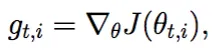

                    A derivative of loss function for given parameters at a given time t.


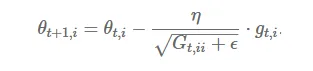

                          Update parameters for given input i and at time/iteration t

η is a learning rate which is modified for given parameter θ(i) at a given time based on previous gradients calculated for given parameter θ(i).
We store the sum of the squares of the gradients w.r.t. θ(i) up to time step t, while ϵ is a smoothing term that avoids division by zero (usually on the order of 1e−8). Interestingly, without the square root operation, the algorithm performs much worse.
It makes big updates for less frequent parameters and a small step for frequent parameters.

Advantages:

Learning rate changes for each training parameter.
Don’t need to manually tune the learning rate.
Able to train on sparse data.

Disadvantages:

Computationally expensive as a need to calculate the second order derivative.
The learning rate is always decreasing results in slow training.

#### RMSPROP

RMSprop, which stands for Root Mean Square Propagation, is an adaptive learning rate optimization algorithm commonly used in the training of neural networks. It is designed to address some of the limitations of the basic stochastic gradient descent (SGD) algorithm, especially when dealing with problems with sparse data and non-convex optimization landscapes.

RMSprop is a gradient-based optimization technique used in training neural networks. It was proposed by the father of back-propagation, Geoffrey Hinton. Gradients of very complex functions like neural networks have a tendency to either vanish or explode as the data propagates through the function (refer to vanishing gradients problem). Rmsprop was developed as a stochastic technique for mini-batch learning.

RMSprop deals with the above issue by using a moving average of squared gradients to normalize the gradient. This normalization balances the step size (momentum), decreasing the step for large gradients to avoid exploding and increasing the step for small gradients to avoid vanishing.

Simply put, RMSprop uses an adaptive learning rate instead of treating the learning rate as a hyperparameter. This means that the learning rate changes over time.

RMSprop’s update rule:

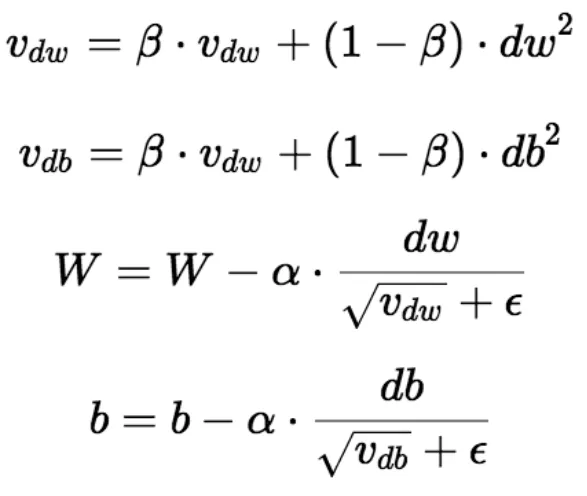

#### ADAM

The Adam optimizer, short for Adaptive Moment Estimation, is a popular optimization algorithm used in the training of neural networks. It combines ideas from both Momentum optimization and RMSprop. Adam maintains two moving averages for each parameter: the first moment (mean) and the second moment (uncentered variance). These moving averages are used to adaptively adjust the learning rates of the parameters during training.

Here's a more detailed explanation of the Adam optimizer:

Algorithm Steps:

Initialize Parameters:
Initialize the model parameters (weights and biases) randomly.

Initialize Moments:
Initialize two moment vectors: m (first moment, initialized to zeros) and v (second moment, initialized to zeros).


For each iteration t:

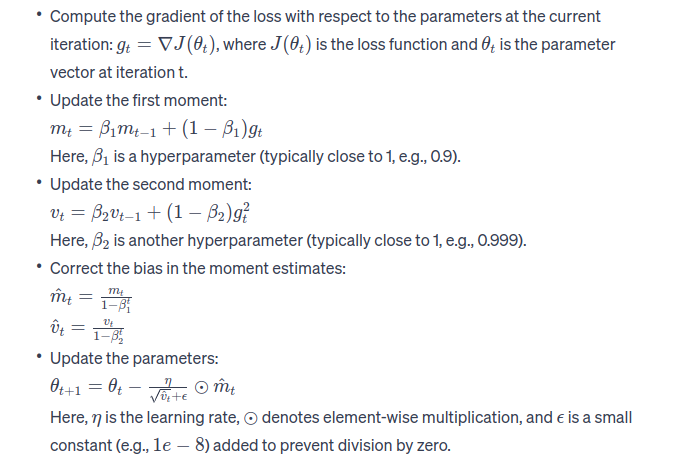

#### Gradient Descent Implementation

Final Parameters (theta): [[4.15809376]
 [2.8204434 ]]


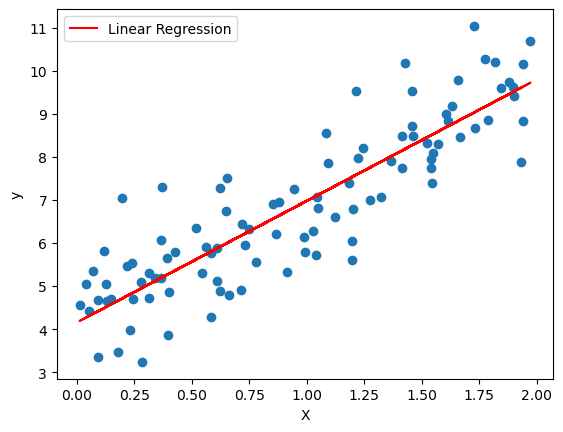

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Set hyperparameters
learning_rate = 0.01
n_iterations = 1000

# Initialize random weights
theta = np.random.randn(2, 1)

# Implement gradient descent
for iteration in range(n_iterations):
    gradients = 2 / 100 * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

# Print the final parameters
print("Final Parameters (theta):", theta)

# Plot the original data and the regression line
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Gradient Descent:

The loop iterates n_iterations times.

X_b.dot(theta) computes the predicted values based on the current weights.

(X_b.dot(theta) - y) calculates the errors (difference between predicted and actual values).

X_b.T.dot(...) computes the dot product of the transposed feature matrix and the errors.

gradients represents the gradient of the mean squared error loss with respect to the weights.

The weights are updated using the gradient descent update rule: theta = theta - learning_rate * gradients.

#### Momentum

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Set hyperparameters
learning_rate = 0.01
momentum_factor = 0.9
n_iterations = 1000

# Initialize random weights and momentum terms
theta = np.random.randn(2, 1)
momentum = np.zeros_like(theta)

# Implement gradient descent with momentum
for iteration in range(n_iterations):
    gradients = 2 / 100 * X_b.T.dot(X_b.dot(theta) - y)
    
    # Update momentum
    momentum = momentum_factor * momentum + learning_rate * gradients
    
    # Update parameters with momentum
    theta = theta - momentum

# Print the final parameters
print("Final Parameters (theta):", theta)

# # Plot the original data and the regression line
# plt.scatter(X, y)
# plt.plot(X, X_b.dot(theta), color='red', label='Linear Regression with Momentum')
# plt.xlabel('X')
# plt.ylabel('y')
# plt.legend()
# plt.show()


Final Parameters (theta): [[4.21509616]
 [2.77011339]]


#### RMSPROP

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Set hyperparameters
learning_rate = 0.01
beta = 0.9  # Decay rate for the moving average
epsilon = 1e-8  # Small constant for numerical stability
n_iterations = 1000

# Initialize random weights
theta = np.random.randn(2, 1)

# Initialize the squared gradient accumulator
E_g_squared = np.zeros_like(theta)

# Implement RMSprop
for iteration in range(n_iterations):
    gradients = 2 / 100 * X_b.T.dot(X_b.dot(theta) - y)

    # Update the squared gradient accumulator
    E_g_squared = beta * E_g_squared + (1 - beta) * gradients**2

    # Update parameters using RMSprop
    theta = theta - learning_rate / np.sqrt(E_g_squared + epsilon) * gradients

# Print the final parameters
print("Final Parameters (theta):", theta)

# # Plot the original data and the regression line
# plt.scatter(X, y)
# plt.plot(X, X_b.dot(theta), color='red', label='Linear Regression with RMSprop')
# plt.xlabel('X')
# plt.ylabel('y')
# plt.legend()
# plt.show()


Final Parameters (theta): [[4.22009609]
 [2.77511333]]


RMSprop:

Compute Gradients:
gradients are computed using the gradient of the mean squared error loss with respect to the parameters (weights). This involves the transpose of the feature matrix X_b, the dot product, and the difference between predictions and actual values.

Update Squared Gradient Accumulator:
E_g_squared is the accumulator for the squared gradients. It is updated using the RMSprop formula.
The new value of E_g_squared is a combination of the previous value (beta * E_g_squared) and the squared gradients for the current iteration ((1 - beta) * gradients**2).

Update Parameters using RMSprop:
The parameters (theta) are updated using the RMSprop update rule.
The update involves subtracting a term that is proportional to the learning rate divided by the square root of the accumulated squared gradients (E_g_squared).
The term (E_g_squared + epsilon) is used to prevent division by zero and improve numerical stability.

Iterations:
The entire process is repeated for a specified number of iterations (n_iterations).


#### ADAM

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Set hyperparameters
learning_rate = 0.01
beta1 = 0.9  # Exponential decay rate for the first moment estimate
beta2 = 0.999  # Exponential decay rate for the second moment estimate
epsilon = 1e-8  # Small constant for numerical stability
n_iterations = 1000

# Initialize random weights
theta = np.random.randn(2, 1)

# Initialize the first and second moment estimates
m = np.zeros_like(theta)
v = np.zeros_like(theta)

# Initialize iteration counter
t = 0

# Implement Adam
for iteration in range(1, n_iterations + 1):
    gradients = 2 / 100 * X_b.T.dot(X_b.dot(theta) - y)
    t += 1
    
    # Update first moment estimate
    m = beta1 * m + (1 - beta1) * gradients
    
    # Update second moment estimate
    v = beta2 * v + (1 - beta2) * gradients**2
    
    # Bias correction for first and second moment estimates
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    
    # Update parameters using Adam
    theta = theta - learning_rate / (np.sqrt(v_hat) + epsilon) * m_hat

# Print the final parameters
print("Final Parameters (theta):", theta)

# # Plot the original data and the regression line
# plt.scatter(X, y)
# plt.plot(X, X_b.dot(theta), color='red', label='Linear Regression with Adam')
# plt.xlabel('X')
# plt.ylabel('y')
# plt.legend()
# plt.show()


Final Parameters (theta): [[3.38256972]
 [3.50170222]]
